In [48]:
import numpy as np 
import pandas as pd 
import calendar
import math
import statistics
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor



from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Get colors list
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
map_t = gpd.read_file("C:/Users/cb7en/OneDrive/Documentos/Stats Master - Wei/Auto Theft Data/Neighbourhoods - 4326.shp")
map_t

,_id1,AREA_ID2,AREA_AT3,PARENT_4,AREA_SH5,AREA_LO6,AREA_NA7,AREA_DE8,CLASSIF9,CLASSIF10,OBJECTI11,geometry
0,1,2502366,26022881,0,174,174,South Eglinton-Davisville,South Eglinton-Davisville (174),Not an NIA or Emerging Neighbourhood,NA,17824737.0,"POLYGON ((-79.38635 43.69783, -79.38623 43.697..."
1,2,2502365,26022880,0,173,173,North Toronto,North Toronto (173),Not an NIA or Emerging Neighbourhood,NA,17824753.0,"POLYGON ((-79.39744 43.70693, -79.39837 43.706..."
2,3,2502364,26022879,0,172,172,Dovercourt Village,Dovercourt Village (172),Not an NIA or Emerging Neighbourhood,NA,17824769.0,"POLYGON ((-79.43411 43.66015, -79.43537 43.659..."
3,4,2502363,26022878,0,171,171,Junction-Wallace Emerson,Junction-Wallace Emerson (171),Not an NIA or Emerging Neighbourhood,NA,17824785.0,"POLYGON ((-79.4387 43.66766, -79.43841 43.6669..."
4,5,2502362,26022877,0,170,170,Yonge-Bay Corridor,Yonge-Bay Corridor (170),Not an NIA or Emerging Neighbourhood,NA,17824801.0,"POLYGON ((-79.38404 43.64497, -79.38502 43.644..."
...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,2502213,26022728,0,001,001,West Humber-Clairville,West Humber-Clairville (1),Not an NIA or Emerging Neighbourhood,NA,17827185.0,"POLYGON ((-79.59037 43.73401, -79.58942 43.732..."
154,155,2502212,26022727,0,024,024,Black Creek,Black Creek (24),Neighbourhood Improvement Area,NIA,17827201.0,"POLYGON ((-79.51915 43.77399, -79.51901 43.773..."
155,156,2502211,26022726,0,023,023,Pelmo Park-Humberlea,Pelmo Park-Humberlea (23),Not an NIA or Emerging Neighbourhood,NA,17827217.0,"POLYGON ((-79.53225 43.73505, -79.52938 43.723..."
156,157,2502210,26022725,0,022,022,Humbermede,Humbermede (22),Neighbourhood Improvement Area,NIA,17827233.0,"POLYGON ((-79.52813 43.74425, -79.52721 43.740..."


<Figure size 1800x1200 with 0 Axes>

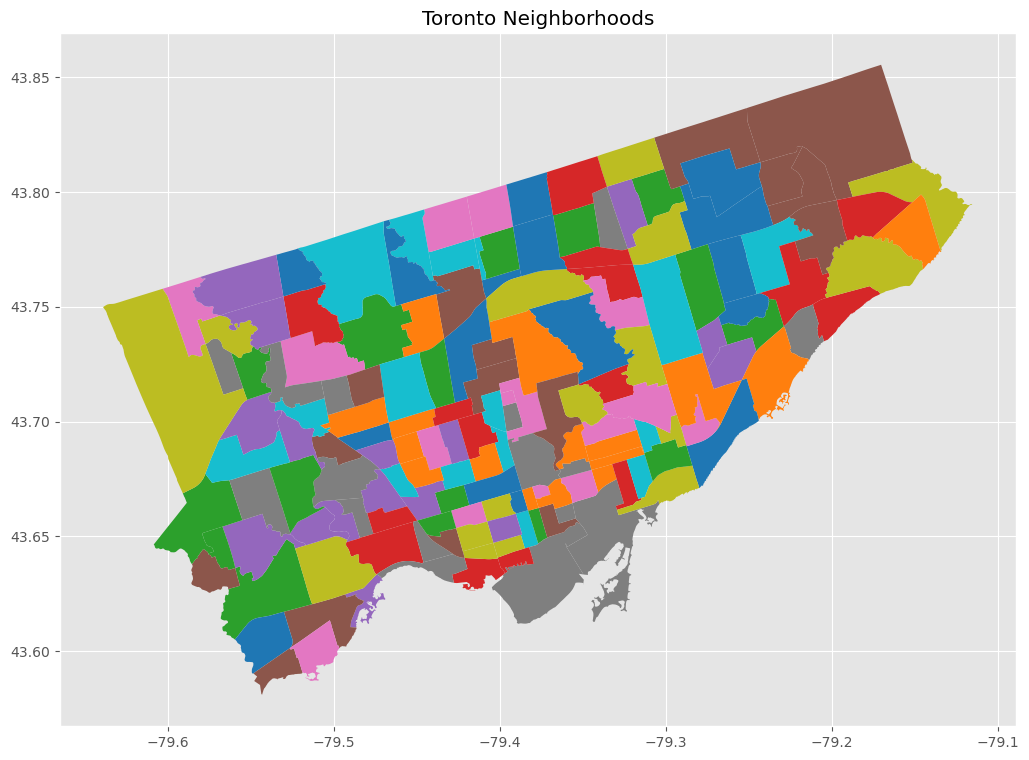

In [7]:
fig = plt.figure(figsize=(18,12))
# # color="white", edgecolor="black",
map_t.plot(column='AREA_NA7',figsize=(16, 9));

plt.title('Toronto Neighborhoods')
plt.show()

In [4]:
# get the data heading
data = pd.read_csv("Auto_Theft_Open_Data.csv",parse_dates = ['REPORT_DATE', 'OCC_DATE'])
data.head()

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-20141263217,2014-01-01 05:00:00,2013-12-31 05:00:00,2014,January,1,1,Wednesday,16,...,Theft Of Motor Vehicle,Auto Theft,043,Victoria Village (43),043,Victoria Village (43),-79.306754,43.734654,-8.828387e+06,5.424471e+06
1,2,GO-20141262914,2014-01-01 05:00:00,2014-01-01 05:00:00,2014,January,1,1,Wednesday,15,...,Theft Of Motor Vehicle,Auto Theft,123,Cliffcrest (123),123,Cliffcrest (123),-79.236119,43.721827,-8.820524e+06,5.422495e+06
2,3,GO-20141262837,2014-01-01 05:00:00,2013-12-25 05:00:00,2014,January,1,1,Wednesday,15,...,Theft Of Motor Vehicle,Auto Theft,159,Etobicoke City Centre (159),014,Islington-City Centre West (14),-79.529692,43.618988,-8.853205e+06,5.406668e+06
3,4,GO-20141266240,2014-01-02 05:00:00,2014-01-02 05:00:00,2014,January,2,2,Thursday,9,...,Theft Of Motor Vehicle,Auto Theft,060,Woodbine-Lumsden (60),060,Woodbine-Lumsden (60),-79.313796,43.688101,-8.829171e+06,5.417301e+06
4,5,GO-20141266097,2014-01-02 05:00:00,2014-01-02 05:00:00,2014,January,2,2,Thursday,8,...,Theft Of Motor Vehicle,Auto Theft,129,Agincourt North (129),129,Agincourt North (129),-79.273925,43.813557,-8.824733e+06,5.436635e+06


In [5]:
# columns Names and type of data (object, int, float)
# number of rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63633 entries, 0 to 63632
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OBJECTID           63633 non-null  int64         
 1   EVENT_UNIQUE_ID    63633 non-null  object        
 2   REPORT_DATE        63633 non-null  datetime64[ns]
 3   OCC_DATE           63633 non-null  datetime64[ns]
 4   REPORT_YEAR        63633 non-null  int64         
 5   REPORT_MONTH       63633 non-null  object        
 6   REPORT_DAY         63633 non-null  int64         
 7   REPORT_DOY         63633 non-null  int64         
 8   REPORT_DOW         63633 non-null  object        
 9   REPORT_HOUR        63633 non-null  int64         
 10  OCC_YEAR           63629 non-null  float64       
 11  OCC_MONTH          63629 non-null  object        
 12  OCC_DAY            63629 non-null  float64       
 13  OCC_DOY            63629 non-null  float64       
 14  OCC_DO

In [13]:
# Show Columns to drop because contain the same information or irrelavant info

# 'X', 'Y', 'OBJECTID', 'UCR_CODE', 'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY'

data_drop = data[['EVENT_UNIQUE_ID','OBJECTID', 'UCR_CODE', 'UCR_EXT', 'OFFENCE','MCI_CATEGORY','X','Y']]
data_drop

,EVENT_UNIQUE_ID,OBJECTID,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,X,Y
0,GO-20141263217,1,2135,210,Theft Of Motor Vehicle,Auto Theft,-8.828387e+06,5.424471e+06
1,GO-20141262914,2,2135,210,Theft Of Motor Vehicle,Auto Theft,-8.820524e+06,5.422495e+06
2,GO-20141262837,3,2135,210,Theft Of Motor Vehicle,Auto Theft,-8.853205e+06,5.406668e+06
3,GO-20141266240,4,2135,210,Theft Of Motor Vehicle,Auto Theft,-8.829171e+06,5.417301e+06
4,GO-20141266097,5,2135,210,Theft Of Motor Vehicle,Auto Theft,-8.824733e+06,5.436635e+06
...,...,...,...,...,...,...,...,...
63628,GO-20241425923,63629,2135,210,Theft Of Motor Vehicle,Auto Theft,-8.848528e+06,5.423217e+06
63629,GO-20241428202,63630,2135,210,Theft Of Motor Vehicle,Auto Theft,-8.845945e+06,5.414226e+06
63630,GO-20241423683,63631,2135,210,Theft Of Motor Vehicle,Auto Theft,-8.851822e+06,5.405931e+06
63631,GO-20241425923,63632,2135,210,Theft Of Motor Vehicle,Auto Theft,-8.848528e+06,5.423217e+06


In [15]:
df = data.drop(data_drop, axis=1)
df

,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,...,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,2014-01-01 05:00:00+00:00,2013-12-31 05:00:00+00:00,2014,January,1,1,Wednesday,16,2013.0,December,...,17,D33,"Apartment (Rooming House, Condo)",Apartment,043,Victoria Village (43),043,Victoria Village (43),-79.306754,43.734654
1,2014-01-01 05:00:00+00:00,2014-01-01 05:00:00+00:00,2014,January,1,1,Wednesday,15,2014.0,January,...,15,D43,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,123,Cliffcrest (123),123,Cliffcrest (123),-79.236119,43.721827
2,2014-01-01 05:00:00+00:00,2013-12-25 05:00:00+00:00,2014,January,1,1,Wednesday,15,2013.0,December,...,0,D22,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,159,Etobicoke City Centre (159),014,Islington-City Centre West (14),-79.529692,43.618988
3,2014-01-02 05:00:00+00:00,2014-01-02 05:00:00+00:00,2014,January,2,2,Thursday,9,2014.0,January,...,9,D54,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,060,Woodbine-Lumsden (60),060,Woodbine-Lumsden (60),-79.313796,43.688101
4,2014-01-02 05:00:00+00:00,2014-01-02 05:00:00+00:00,2014,January,2,2,Thursday,8,2014.0,January,...,1,D42,"Single Home, House (Attach Garage, Cottage, Mo...",House,129,Agincourt North (129),129,Agincourt North (129),-79.273925,43.813557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63628,2024-06-30 05:00:00+00:00,2024-06-28 05:00:00+00:00,2024,June,30,182,Sunday,13,2024.0,June,...,20,D31,"Single Home, House (Attach Garage, Cottage, Mo...",House,154,Oakdale-Beverley Heights (154),026,Downsview-Roding-CFB (26),-79.487683,43.726513
63629,2024-06-30 05:00:00+00:00,2024-06-30 05:00:00+00:00,2024,June,30,182,Sunday,19,2024.0,June,...,19,D11,Bank And Other Financial Institutions (Money M...,Commercial,090,Junction Area (90),090,Junction Area (90),-79.464478,43.668120
63630,2024-06-30 05:00:00+00:00,2024-06-30 05:00:00+00:00,2024,June,30,182,Sunday,6,2024.0,June,...,2,D22,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,160,Mimico-Queensway (160),017,Mimico (includes Humber Bay Shores) (17),-79.517267,43.614199
63631,2024-06-30 05:00:00+00:00,2024-06-28 05:00:00+00:00,2024,June,30,182,Sunday,13,2024.0,June,...,20,D31,"Single Home, House (Attach Garage, Cottage, Mo...",House,154,Oakdale-Beverley Heights (154),026,Downsview-Roding-CFB (26),-79.487683,43.726513


In [166]:
# Check and all Toronto neighbourhood by the alphabetically by the Name
sorted(data['NEIGHBOURHOOD_158'].unique())

['Agincourt North (129)',
 'Agincourt South-Malvern West (128)',
 'Alderwood (20)',
 'Annex (95)',
 'Avondale (153)',
 'Banbury-Don Mills (42)',
 'Bathurst Manor (34)',
 'Bay-Cloverhill (169)',
 'Bayview Village (52)',
 'Bayview Woods-Steeles (49)',
 'Bedford Park-Nortown (39)',
 'Beechborough-Greenbrook (112)',
 'Bendale South (157)',
 'Bendale-Glen Andrew (156)',
 'Birchcliffe-Cliffside (122)',
 'Black Creek (24)',
 'Blake-Jones (69)',
 'Briar Hill-Belgravia (108)',
 'Bridle Path-Sunnybrook-York Mills (41)',
 'Broadview North (57)',
 'Brookhaven-Amesbury (30)',
 'Cabbagetown-South St.James Town (71)',
 'Caledonia-Fairbank (109)',
 'Casa Loma (96)',
 'Centennial Scarborough (133)',
 'Church-Wellesley (167)',
 'Clairlea-Birchmount (120)',
 'Clanton Park (33)',
 'Cliffcrest (123)',
 'Corso Italia-Davenport (92)',
 'Danforth (66)',
 'Danforth East York (59)',
 'Don Valley Village (47)',
 'Dorset Park (126)',
 'Dovercourt Village (172)',
 'Downsview (155)',
 'Downtown Yonge East (168)',
 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63633 entries, 0 to 63632
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   REPORT_DATE        63633 non-null  datetime64[ns, UTC]
 1   OCC_DATE           63633 non-null  datetime64[ns, UTC]
 2   REPORT_YEAR        63633 non-null  int64              
 3   REPORT_MONTH       63633 non-null  object             
 4   REPORT_DAY         63633 non-null  int64              
 5   REPORT_DOY         63633 non-null  int64              
 6   REPORT_DOW         63633 non-null  object             
 7   REPORT_HOUR        63633 non-null  int64              
 8   OCC_YEAR           63633 non-null  float64            
 9   OCC_MONTH          63633 non-null  object             
 10  OCC_DAY            63629 non-null  float64            
 11  OCC_DOY            63629 non-null  float64            
 12  OCC_DOW            63629 non-null  object     

In [33]:
pd.set_option('display.max_columns', None)
df[df.isna().any(axis=1)]

,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
1039,2014-04-24 05:00:00+00:00,1978-04-10 05:00:00+00:00,2014,April,24,114,Thursday,8,2014.0,April,NaN,NaN,NaN,0,D31,"Single Home, House (Attach Garage, Cottage, Mo...",House,025,Glenfield-Jane Heights (25),025,Glenfield-Jane Heights (25),-79.506621,43.739773
9246,2016-09-19 05:00:00+00:00,1996-01-01 05:00:00+00:00,2016,September,19,263,Monday,13,2016.0,September,NaN,NaN,NaN,0,D55,"Police / Courts (Parole Board, Probation Office)",Other,064,Woodbine Corridor (64),064,Woodbine Corridor (64),-79.317653,43.668973
9252,2016-09-19 05:00:00+00:00,1996-01-01 05:00:00+00:00,2016,September,19,263,Monday,13,2016.0,September,NaN,NaN,NaN,0,D55,"Police / Courts (Parole Board, Probation Office)",Other,064,Woodbine Corridor (64),064,Woodbine Corridor (64),-79.317653,43.668973
33660,2021-08-25 05:00:00+00:00,1990-08-10 05:00:00+00:00,2021,August,25,237,Wednesday,11,2021.0,August,NaN,NaN,NaN,12,D41,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,123,Cliffcrest (123),123,Cliffcrest (123),-79.248508,43.711942


In [41]:
# Filling NaN values by similar column data
df.OCC_YEAR.fillna(df.REPORT_YEAR, inplace=True)
df.OCC_MONTH.fillna(df.REPORT_MONTH, inplace=True)
df.OCC_DAY.fillna(df.REPORT_DAY, inplace=True)
df.OCC_DOY.fillna(df.REPORT_DOY, inplace=True)
df.OCC_DOW.fillna(df.REPORT_DOW, inplace=True)

In [43]:
# Checking NaN
df[df.isna().any(axis=1)]

,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84


In [59]:
# Define a search function
def search_string(s, search):
    return search in str(s).lower()

# Search for the string 'al' in all columns
mask = df.apply(lambda x: x.map(lambda s: search_string(s, 'NSA')))

# Filter the DataFrame based on the mask
filtered_df = df.loc[mask.any(axis=1)]
print(filtered_df)

Empty DataFrame
Columns: [REPORT_DATE, OCC_DATE, REPORT_YEAR, REPORT_MONTH, REPORT_DAY, REPORT_DOY, REPORT_DOW, REPORT_HOUR, OCC_YEAR, OCC_MONTH, OCC_DAY, OCC_DOY, OCC_DOW, OCC_HOUR, DIVISION, LOCATION_TYPE, PREMISES_TYPE, HOOD_158, NEIGHBOURHOOD_158, HOOD_140, NEIGHBOURHOOD_140, LONG_WGS84, LAT_WGS84]
Index: []


In [45]:
# drop the rows with data such as NSA (Non Specific Area)
# there are 3 columns contain the NSA ('HOOD_140', 'HOOD_158' and 'DIVISION')

data['HOOD_158'].replace('NSA', 0, inplace = True)
data['HOOD_140'].replace('NSA', 0, inplace = True)
data['DIVISION'].replace('NSA', 0, inplace = True)

,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,2014-01-01 05:00:00+00:00,2013-12-31 05:00:00+00:00,2014,January,1,1,Wednesday,16,2013.0,December,31.0,365.0,Tuesday,17,D33,"Apartment (Rooming House, Condo)",Apartment,043,Victoria Village (43),043,Victoria Village (43),-79.306754,43.734654
1,2014-01-01 05:00:00+00:00,2014-01-01 05:00:00+00:00,2014,January,1,1,Wednesday,15,2014.0,January,1.0,1.0,Wednesday,15,D43,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,123,Cliffcrest (123),123,Cliffcrest (123),-79.236119,43.721827
2,2014-01-01 05:00:00+00:00,2013-12-25 05:00:00+00:00,2014,January,1,1,Wednesday,15,2013.0,December,25.0,359.0,Wednesday,0,D22,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,159,Etobicoke City Centre (159),014,Islington-City Centre West (14),-79.529692,43.618988
3,2014-01-02 05:00:00+00:00,2014-01-02 05:00:00+00:00,2014,January,2,2,Thursday,9,2014.0,January,2.0,2.0,Thursday,9,D54,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,060,Woodbine-Lumsden (60),060,Woodbine-Lumsden (60),-79.313796,43.688101
4,2014-01-02 05:00:00+00:00,2014-01-02 05:00:00+00:00,2014,January,2,2,Thursday,8,2014.0,January,2.0,2.0,Thursday,1,D42,"Single Home, House (Attach Garage, Cottage, Mo...",House,129,Agincourt North (129),129,Agincourt North (129),-79.273925,43.813557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63628,2024-06-30 05:00:00+00:00,2024-06-28 05:00:00+00:00,2024,June,30,182,Sunday,13,2024.0,June,28.0,180.0,Friday,20,D31,"Single Home, House (Attach Garage, Cottage, Mo...",House,154,Oakdale-Beverley Heights (154),026,Downsview-Roding-CFB (26),-79.487683,43.726513
63629,2024-06-30 05:00:00+00:00,2024-06-30 05:00:00+00:00,2024,June,30,182,Sunday,19,2024.0,June,30.0,182.0,Sunday,19,D11,Bank And Other Financial Institutions (Money M...,Commercial,090,Junction Area (90),090,Junction Area (90),-79.464478,43.668120
63630,2024-06-30 05:00:00+00:00,2024-06-30 05:00:00+00:00,2024,June,30,182,Sunday,6,2024.0,June,30.0,182.0,Sunday,2,D22,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,160,Mimico-Queensway (160),017,Mimico (includes Humber Bay Shores) (17),-79.517267,43.614199
63631,2024-06-30 05:00:00+00:00,2024-06-28 05:00:00+00:00,2024,June,30,182,Sunday,13,2024.0,June,28.0,180.0,Friday,20,D31,"Single Home, House (Attach Garage, Cottage, Mo...",House,154,Oakdale-Beverley Heights (154),026,Downsview-Roding-CFB (26),-79.487683,43.726513


In [24]:
# chech data after drop non-essential columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63633 entries, 0 to 63632
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   REPORT_DATE        63633 non-null  datetime64[ns, UTC]
 1   OCC_DATE           63633 non-null  datetime64[ns, UTC]
 2   REPORT_YEAR        63633 non-null  int64              
 3   REPORT_MONTH       63633 non-null  object             
 4   REPORT_DAY         63633 non-null  int64              
 5   REPORT_DOY         63633 non-null  int64              
 6   REPORT_DOW         63633 non-null  object             
 7   REPORT_HOUR        63633 non-null  int64              
 8   OCC_YEAR           63629 non-null  float64            
 9   OCC_MONTH          63629 non-null  object             
 10  OCC_DAY            63629 non-null  float64            
 11  OCC_DOY            63629 non-null  float64            
 12  OCC_DOW            63629 non-null  object     

In [28]:
# check if there are null values 
data.isnull().values.any()

True

In [30]:
# check the null values per column
data.isnull().sum()

REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             4
OCC_MONTH            4
OCC_DAY              4
OCC_DOY              4
OCC_DOW              4
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63633 entries, 0 to 63632
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   REPORT_DATE        63633 non-null  datetime64[ns, UTC]
 1   OCC_DATE           63633 non-null  datetime64[ns, UTC]
 2   REPORT_YEAR        63633 non-null  int64              
 3   REPORT_MONTH       63633 non-null  object             
 4   REPORT_DAY         63633 non-null  int64              
 5   REPORT_DOY         63633 non-null  int64              
 6   REPORT_DOW         63633 non-null  object             
 7   REPORT_HOUR        63633 non-null  int64              
 8   OCC_YEAR           63629 non-null  float64            
 9   OCC_MONTH          63629 non-null  object             
 10  OCC_DAY            63629 non-null  float64            
 11  OCC_DOY            63629 non-null  float64            
 12  OCC_DOW            63629 non-null  object     

In [36]:
data.describe()

,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,LONG_WGS84,LAT_WGS84
count,63633.000000,63633.000000,63633.000000,63633.000000,63629.000000,63629.000000,63629.000000,63633.000000,63633.000000,63633.000000
mean,2020.092091,15.658966,182.295476,11.414848,2020.078046,15.568640,182.058998,13.837600,-78.532294,43.227211
std,2.965559,8.707062,105.017215,5.478690,2.975800,8.750895,105.090597,7.573935,8.378476,4.611694
min,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,-79.639247,0.000000
25%,2018.000000,8.000000,92.000000,7.000000,2018.000000,8.000000,92.000000,7.000000,-79.520909,43.678624
50%,2021.000000,16.000000,178.000000,10.000000,2021.000000,16.000000,178.000000,16.000000,-79.431430,43.719920
75%,2023.000000,23.000000,276.000000,16.000000,2023.000000,23.000000,275.000000,20.000000,-79.334109,43.758828
max,2024.000000,31.000000,366.000000,23.000000,2024.000000,31.000000,366.000000,23.000000,0.000000,43.853164


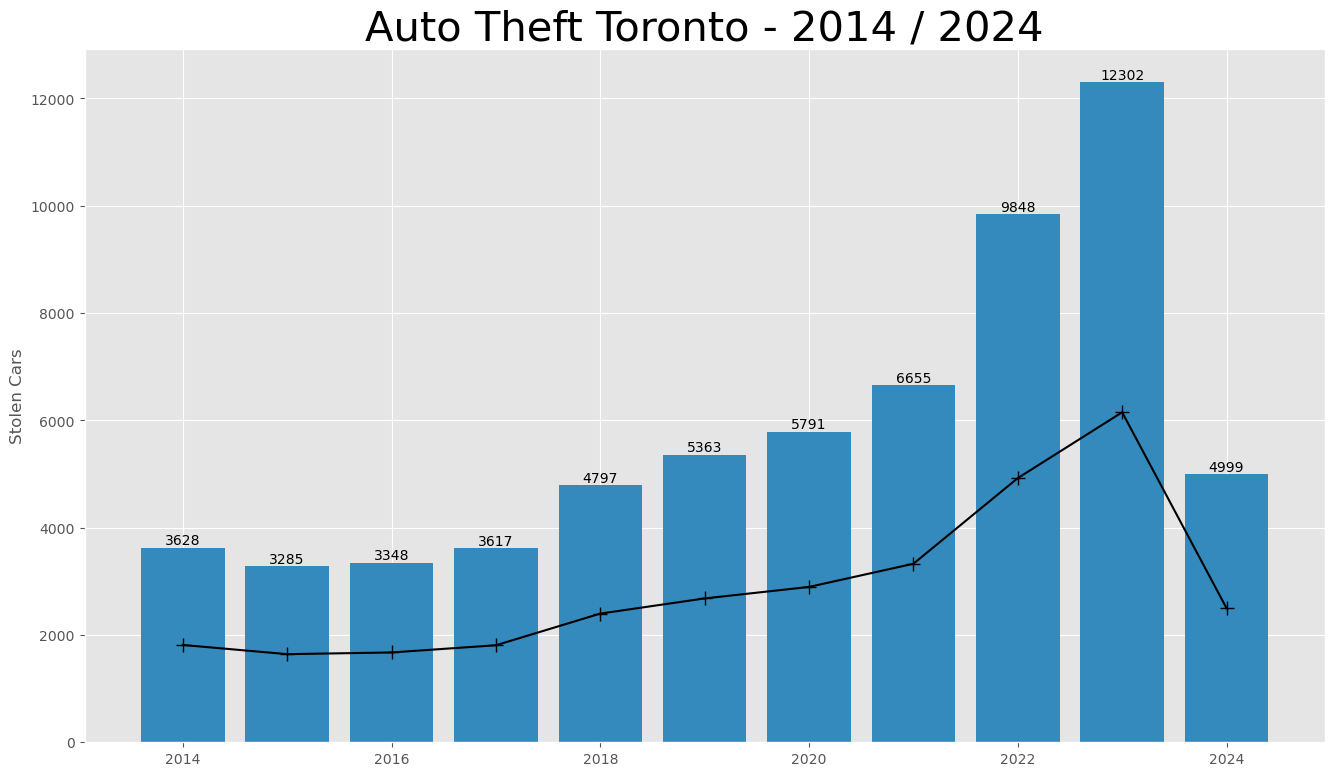

In [38]:
# adding a coulumn ("Count") to represent the count for the theft
ct = []
for i in range(len(data)):
    x =1
    ct.append(x)
data["Count"] = ct

# Count the times per year (Total of auto thefts per year)
count_theft = pd.DataFrame(data.groupby(data.REPORT_DATE.dt.year)["Count"].sum())

# Find average of each year 
avg = []
for t in range(len(count_theft.Count.tolist())):
    g = count_theft.Count.tolist()[t]/2
    avg.append(g)

# Print a Bar plot with quantity for every year + average per year
fig, ax = plt.subplots(figsize=(16,9))
ax.bar(count_theft.index.tolist(), count_theft.Count.tolist())
ax.plot(count_theft.index.tolist(),avg, marker='+', color='black', ms=10)
ax.set_ylabel('Stolen Cars')
ax.set_title('Auto Theft Toronto - 2014 / 2024', fontsize = 30)

for t, v in count_theft.items():
    p = ax.bar(count_theft.index.tolist(), v, label=t, bottom=np.zeros(11))
    ax.bar_label(p, label_type='edge')

fig = plt.gcf()
fig.savefig("C:/Users/cb7en/OneDrive/Documentos/Stats Master - Wei/Graphic.png",dpi=300)
plt.show()

In [40]:
data['NEIGHBOURHOOD_158'].value_counts().nlargest(10)

NEIGHBOURHOOD_158
West Humber-Clairville (1)        5037
York University Heights (27)      1622
Etobicoke City Centre (159)       1403
Humber Summit (21)                1106
Wexford/Maryvale (119)            1020
Milliken (130)                    1011
Yorkdale-Glen Park (31)            983
Oakdale-Beverley Heights (154)     943
Glenfield-Jane Heights (25)        904
Bedford Park-Nortown (39)          904
Name: count, dtype: int64

In [46]:
data.groupby('REPORT_MONTH')["Count"].sum()

REPORT_MONTH
April        5427
August       4977
December     5069
February     4798
January      5307
July         4898
June         5620
March        5601
May          5649
November     5547
October      5590
September    5150
Name: Count, dtype: int64

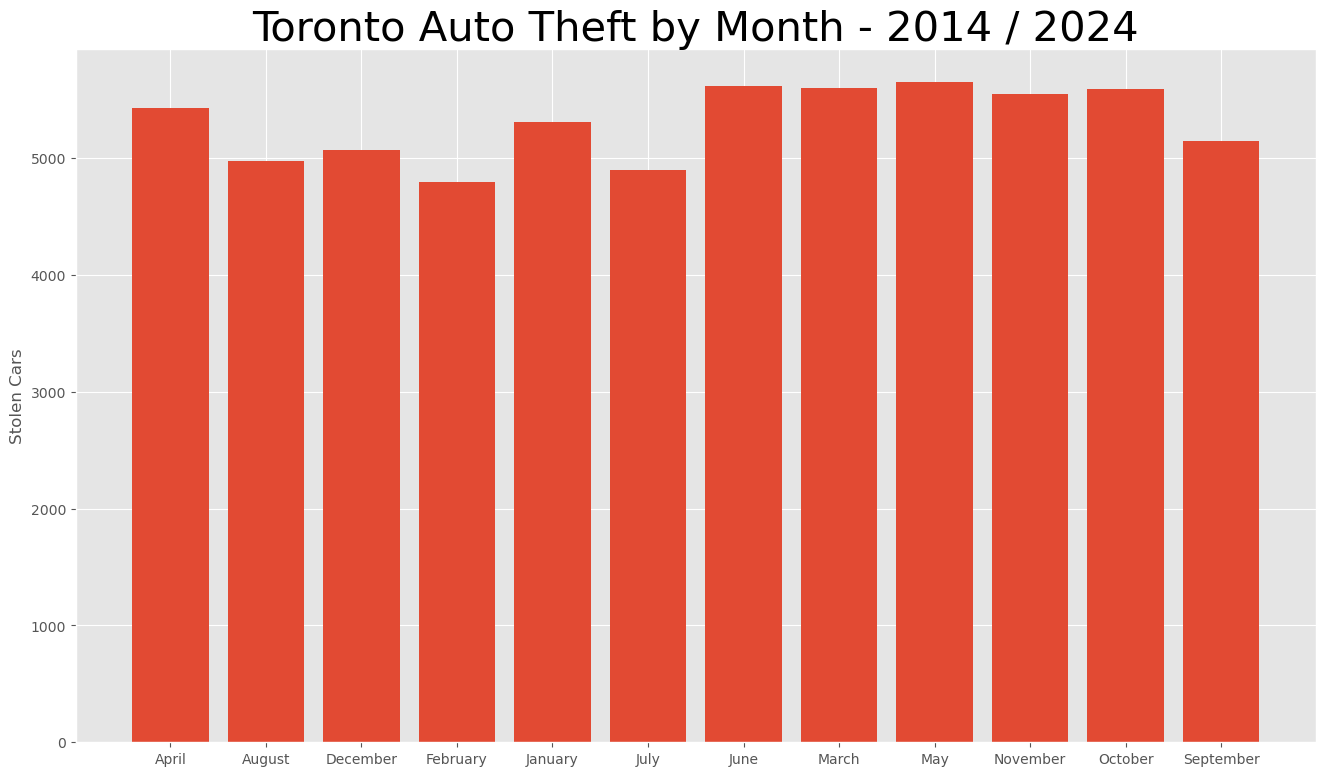

In [48]:
# Numbers by Month

grouped = data.groupby('REPORT_MONTH')["Count"].sum()

fig, ax = plt.subplots(figsize=(16,9))
ax.bar(grouped.index.tolist(), grouped.tolist())
ax.set_ylabel('Stolen Cars')
ax.set_title('Toronto Auto Theft by Month - 2014 / 2024', fontsize = 30)
# fig = plt.gcf()
# fig.savefig("C:/Users/cb7en/OneDrive/Documentos/Stats Master - Wei/Graphic_Month.png",dpi=300)
plt.show()


Text(0.5, 1.0, 'Auto Theft Top 10 Neighbourhoods Toronto - 2014 / 2024')

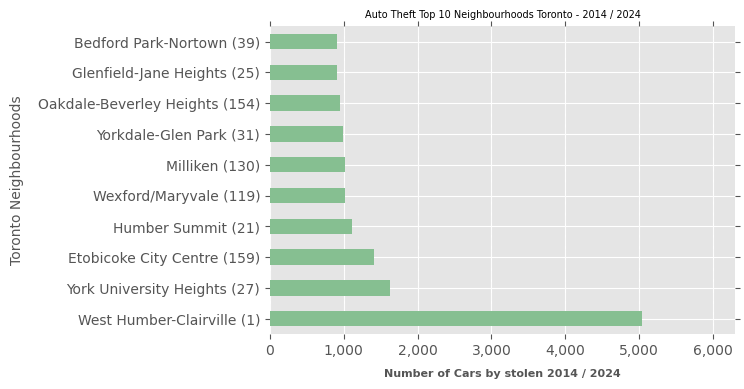

In [50]:
from matplotlib.ticker import StrMethodFormatter

ax = data['NEIGHBOURHOOD_158'].value_counts().nlargest(10).plot(kind='barh', figsize=(6, 4), color='#86bf91', zorder=2, width=0.5)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.1, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Number of Cars by stolen 2014 / 2024", labelpad=8, weight='bold', size=8)

# Set y-axis label
ax.set_ylabel("Toronto Neighbourhoods", labelpad=10, size=10)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Set Title
ax.set_title('Auto Theft Top 10 Neighbourhoods Toronto - 2014 / 2024', fontsize = 7)

#fig = plt.gcf()
#fig.savefig("C:/Users/cb7en/OneDrive/Documentos/Stats Master - Wei/Neighbourhood_.png",dpi=300)

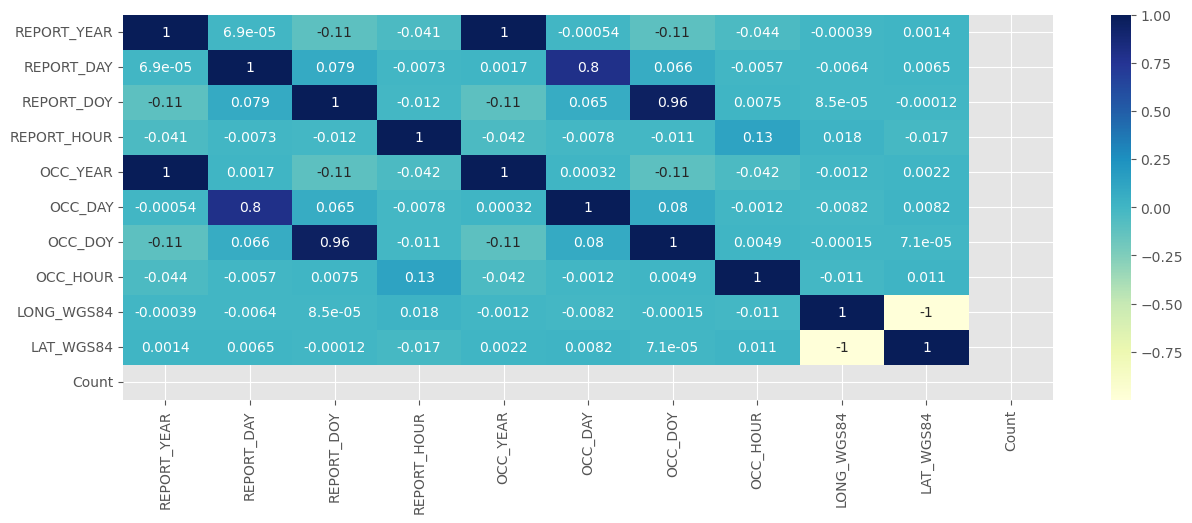

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
fig = plt.gcf()
fig.savefig("C:/Users/cb7en/OneDrive/Documentos/Stats Master - Wei/Correlation.png",dpi=300)

In [54]:
m = data.groupby([data.REPORT_DATE.dt.year, data.REPORT_DATE.dt.month])["Count"].sum()
m

REPORT_DATE  REPORT_DATE
2014         1              228
             2              253
             3              309
             4              309
             5              304
                           ... 
2024         2              872
             3              840
             4              792
             5              811
             6              699
Name: Count, Length: 126, dtype: int64

In [7]:
df_clean = pd.read_csv('clearned_autotheft_data.csv')

In [8]:

# Group by all columns except Count and sum the Count column
grouped_df = df_clean.groupby(['OCC_YEAR', 'OCC_MONTH', 'DIVISION', 'PREMISES_TYPE', 'NEIGHBOURHOOD_158'])['Count'].sum().reset_index()

grouped_df.head()

,OCC_YEAR,OCC_MONTH,DIVISION,PREMISES_TYPE,NEIGHBOURHOOD_158,Count
0,2000.0,February,D13,Outside,Oakwood Village (107),1
1,2000.0,January,D42,Apartment,Malvern East (146),1
2,2001.0,January,D41,House,Clairlea-Birchmount (120),1
3,2001.0,October,D23,House,West Humber-Clairville (1),1
4,2008.0,December,D31,House,Glenfield-Jane Heights (25),1


In [66]:
# Filter out years 2000-2013
filtered_df = grouped_df[grouped_df['OCC_YEAR'] > 2013].copy()

filtered_df
filtered_df.to_csv("clearned_autotheft_data_1.csv", index=False)

In [12]:
# Create dummy variables for categorical columns
# First, let's handle OCC_MONTH, DIVISION, PREMISES_TYPE
df_encoded = pd.get_dummies(filtered_df, 
                          columns=['OCC_MONTH', 'DIVISION', 'PREMISES_TYPE', 'NEIGHBOURHOOD_158'],
                          drop_first=True)  # drop_first=True to avoid multicollinearity

df_encoded

,OCC_YEAR,Count,OCC_MONTH_August,OCC_MONTH_December,OCC_MONTH_February,OCC_MONTH_January,OCC_MONTH_July,OCC_MONTH_June,OCC_MONTH_March,OCC_MONTH_May,...,NEIGHBOURHOOD_158_Woburn North (142),NEIGHBOURHOOD_158_Woodbine Corridor (64),NEIGHBOURHOOD_158_Woodbine-Lumsden (60),NEIGHBOURHOOD_158_Wychwood (94),NEIGHBOURHOOD_158_Yonge-Bay Corridor (170),NEIGHBOURHOOD_158_Yonge-Doris (151),NEIGHBOURHOOD_158_Yonge-Eglinton (100),NEIGHBOURHOOD_158_Yonge-St.Clair (97),NEIGHBOURHOOD_158_York University Heights (27),NEIGHBOURHOOD_158_Yorkdale-Glen Park (31)
48,2014.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49,2014.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
50,2014.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51,2014.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52,2014.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28070,2024.0,1,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
28071,2024.0,3,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
28072,2024.0,7,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
28073,2024.0,2,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28027 entries, 48 to 28074
Columns: 192 entries, OCC_YEAR to NEIGHBOURHOOD_158_Yorkdale-Glen Park (31)
dtypes: bool(190), float64(1), int64(1)
memory usage: 5.7 MB


In [21]:
# spliting training and test, 80/20
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

X = df_encoded.drop('Count', axis=1)
y = df_encoded['Count']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [67]:
df_encoded

,OCC_YEAR,Count,OCC_MONTH_August,OCC_MONTH_December,OCC_MONTH_February,OCC_MONTH_January,OCC_MONTH_July,OCC_MONTH_June,OCC_MONTH_March,OCC_MONTH_May,OCC_MONTH_November,OCC_MONTH_October,OCC_MONTH_September,DIVISION_D12,DIVISION_D13,DIVISION_D14,DIVISION_D22,DIVISION_D23,DIVISION_D31,DIVISION_D32,DIVISION_D33,DIVISION_D41,DIVISION_D42,DIVISION_D43,DIVISION_D51,DIVISION_D52,DIVISION_D53,DIVISION_D54,DIVISION_D55,PREMISES_TYPE_Commercial,PREMISES_TYPE_Educational,PREMISES_TYPE_House,PREMISES_TYPE_Other,PREMISES_TYPE_Outside,PREMISES_TYPE_Transit,NEIGHBOURHOOD_158_Agincourt South-Malvern West (128),NEIGHBOURHOOD_158_Alderwood (20),NEIGHBOURHOOD_158_Annex (95),NEIGHBOURHOOD_158_Avondale (153),NEIGHBOURHOOD_158_Banbury-Don Mills (42),NEIGHBOURHOOD_158_Bathurst Manor (34),NEIGHBOURHOOD_158_Bay-Cloverhill (169),NEIGHBOURHOOD_158_Bayview Village (52),NEIGHBOURHOOD_158_Bayview Woods-Steeles (49),NEIGHBOURHOOD_158_Bedford Park-Nortown (39),NEIGHBOURHOOD_158_Beechborough-Greenbrook (112),NEIGHBOURHOOD_158_Bendale South (157),NEIGHBOURHOOD_158_Bendale-Glen Andrew (156),NEIGHBOURHOOD_158_Birchcliffe-Cliffside (122),NEIGHBOURHOOD_158_Black Creek (24),NEIGHBOURHOOD_158_Blake-Jones (69),NEIGHBOURHOOD_158_Briar Hill-Belgravia (108),NEIGHBOURHOOD_158_Bridle Path-Sunnybrook-York Mills (41),NEIGHBOURHOOD_158_Broadview North (57),NEIGHBOURHOOD_158_Brookhaven-Amesbury (30),NEIGHBOURHOOD_158_Cabbagetown-South St.James Town (71),NEIGHBOURHOOD_158_Caledonia-Fairbank (109),NEIGHBOURHOOD_158_Casa Loma (96),NEIGHBOURHOOD_158_Centennial Scarborough (133),NEIGHBOURHOOD_158_Church-Wellesley (167),NEIGHBOURHOOD_158_Clairlea-Birchmount (120),NEIGHBOURHOOD_158_Clanton Park (33),NEIGHBOURHOOD_158_Cliffcrest (123),NEIGHBOURHOOD_158_Corso Italia-Davenport (92),NEIGHBOURHOOD_158_Danforth (66),NEIGHBOURHOOD_158_Danforth East York (59),NEIGHBOURHOOD_158_Don Valley Village (47),NEIGHBOURHOOD_158_Dorset Park (126),NEIGHBOURHOOD_158_Dovercourt Village (172),NEIGHBOURHOOD_158_Downsview (155),NEIGHBOURHOOD_158_Downtown Yonge East (168),NEIGHBOURHOOD_158_Dufferin Grove (83),NEIGHBOURHOOD_158_East End-Danforth (62),NEIGHBOURHOOD_158_East L'Amoreaux (148),NEIGHBOURHOOD_158_East Willowdale (152),NEIGHBOURHOOD_158_Edenbridge-Humber Valley (9),NEIGHBOURHOOD_158_Eglinton East (138),NEIGHBOURHOOD_158_Elms-Old Rexdale (5),NEIGHBOURHOOD_158_Englemount-Lawrence (32),NEIGHBOURHOOD_158_Eringate-Centennial-West Deane (11),NEIGHBOURHOOD_158_Etobicoke City Centre (159),NEIGHBOURHOOD_158_Etobicoke West Mall (13),NEIGHBOURHOOD_158_Fenside-Parkwoods (150),NEIGHBOURHOOD_158_Flemingdon Park (44),NEIGHBOURHOOD_158_Forest Hill North (102),NEIGHBOURHOOD_158_Forest Hill South (101),NEIGHBOURHOOD_158_Fort York-Liberty Village (163),NEIGHBOURHOOD_158_Glenfield-Jane Heights (25),NEIGHBOURHOOD_158_Golfdale-Cedarbrae-Woburn (141),NEIGHBOURHOOD_158_Greenwood-Coxwell (65),NEIGHBOURHOOD_158_Guildwood (140),NEIGHBOURHOOD_158_Harbourfront-CityPlace (165),NEIGHBOURHOOD_158_Henry Farm (53),NEIGHBOURHOOD_158_High Park North (88),NEIGHBOURHOOD_158_High Park-Swansea (87),NEIGHBOURHOOD_158_Highland Creek (134),NEIGHBOURHOOD_158_Hillcrest Village (48),NEIGHBOURHOOD_158_Humber Bay Shores (161),NEIGHBOURHOOD_158_Humber Heights-Westmount (8),NEIGHBOURHOOD_158_Humber Summit (21),NEIGHBOURHOOD_158_Humbermede (22),NEIGHBOURHOOD_158_Humewood-Cedarvale (106),NEIGHBOURHOOD_158_Ionview (125),NEIGHBOURHOOD_158_Islington (158),NEIGHBOURHOOD_158_Junction Area (90),NEIGHBOURHOOD_158_Junction-Wallace Emerson (171),NEIGHBOURHOOD_158_Keelesdale-Eglinton West (110),NEIGHBOURHOOD_158_Kennedy Park (124),NEIGHBOURHOOD_158_Kensington-Chinatown (78),NEIGHBOURHOOD_158_Kingsview Village-The Westway (6),NEIGHBOURHOOD_158_Kingsway South (15),NEIGHBOURHOOD_158_L'Amoreaux West (147),NEIGHBOURHOOD_158_Lambton Baby Point (114),NEIGHBOURHOOD_158_Lansing-Westgate (38),NEIGHBOURHOOD_158_Lawrence Park North (105),NEIGHBOURHOOD_158_Lawrence Park South (103),NEIGHBOURHOOD_158_Leaside-Bennington (56),NEIGHBOURHOOD_158_Little Portugal (84),NEIGHBOURHO

In [ ]:
mean_count=df_encoded['Count'].mean()
variance_count=df_encoded['Count'].var()
print(f"Mena: {mean_count}, Variance: {variance_count}")

# variance > mean -> use Negative Binomial regression

Mena: 2.2422307061048277, Variance: 6.604884597739754


In [52]:
# fit the possion model using traing data
# Fit the Negative Binomial model using the training data
GLM_model = sm.GLM(y_train, X_train, family=sm.families.Poisson())
GLM_result = GLM_model.fit()

# Display the summary of the model
#GLM_result.summary()


In [54]:
#evaluation

y_pred_p = np.round(GLM_result.predict(X_test))

mse = mean_squared_error(y_test, y_pred_p)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_p)
r2 = r2_score(y_test, y_pred_p)

print("Model Performance Metrics:")
print("Mean Squared Error (RMSE):", round(mse,4))
print("Root Mean Squared Error (RMSE):", round(rmse,4))
print("Mean Absolute Error (MAE):", round(mae,4))
print("R-squared Score:", round(r2,4))

Model Performance Metrics:
Mean Squared Error (RMSE): 3.665
Root Mean Squared Error (RMSE): 1.9144
Mean Absolute Error (MAE): 1.1131
R-squared Score: 0.3183


In [55]:
# GML negative binomial model using traing data
GLM_model_Nb = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial())
GLM_result_Nb = GLM_model_Nb.fit()
y_pred_nb = np.round(GLM_result_Nb.predict(X_test))

mse_nb = mean_squared_error(y_test, y_pred_nb)
rmse_nb = np.sqrt(mse_nb)
mae_nb = mean_absolute_error(y_test, y_pred_nb)
r2_nb = r2_score(y_test, y_pred_nb)

print("Model Performance Metrics:")
print("Mean Squared Error (RMSE):", round(mse_nb,4))
print("Root Mean Squared Error (RMSE):", round(rmse_nb,4))
print("Mean Absolute Error (MAE):", round(mae_nb,4))
print("R-squared Score:", round(r2_nb,4))

Model Performance Metrics:
Mean Squared Error (RMSE): 3.7911
Root Mean Squared Error (RMSE): 1.9471
Mean Absolute Error (MAE): 1.1165
R-squared Score: 0.2948


In [34]:
# drop"PREMISESS_TYPE"
filtered_df_1 = filtered_df.drop(columns=["PREMISES_TYPE"])
filtered_df_1

,OCC_YEAR,OCC_MONTH,DIVISION,NEIGHBOURHOOD_158,Count
48,2014.0,April,D11,Dufferin Grove (83),1
49,2014.0,April,D11,Lambton Baby Point (114),1
50,2014.0,April,D11,Runnymede-Bloor West Village (89),1
51,2014.0,April,D11,High Park-Swansea (87),1
52,2014.0,April,D11,Junction-Wallace Emerson (171),1
...,...,...,...,...,...
28070,2024.0,May,D55,North Riverdale (68),1
28071,2024.0,May,D55,O'Connor-Parkview (54),3
28072,2024.0,May,D55,South Riverdale (70),7
28073,2024.0,May,D55,Taylor-Massey (61),2


In [46]:
# drop"PREMISESS_TYPE"
#pd.set_option('display.max_columns', None)
# Get columns that contain 'PREMISES_TYPE'
# Drop columns containing 'PREMISES_TYPE' in their name
X_train_1 = X_train.drop(columns=[col for col in X_train.columns if 'DIVISON' in col])
X_test_1 = X_test.drop(columns=[col for col in X_test.columns if 'DIVISON' in col])
pd.set_option('display.max_columns', None)


In [47]:
GLM_model_Nb_1 = sm.GLM(y_train, X_train_1, family=sm.families.NegativeBinomial())
GLM_result_Nb_1 = GLM_model_Nb_1.fit()
y_pred_nb_1 = np.round(GLM_result_Nb_1.predict(X_test_1))

mse_nb_1 = mean_squared_error(y_test, y_pred_nb_1)
rmse_nb_1 = np.sqrt(mse_nb_1)
mae_nb_1 = mean_absolute_error(y_test, y_pred_nb_1)
r2_nb_1 = r2_score(y_test, y_pred_nb_1)

print("Model Performance Metrics:")
print("Mean Squared Error (RMSE):", round(mse_nb_1,2))
print("Root Mean Squared Error (RMSE):", round(rmse_nb_1,2))
print("Mean Absolute Error (MAE):", round(mae_nb_1,2))
print("R-squared Score:", round(r2_nb_1,2))

Model Performance Metrics:
Mean Squared Error (RMSE): 3.79
Root Mean Squared Error (RMSE): 1.95
Mean Absolute Error (MAE): 1.12
R-squared Score: 0.29


In [49]:
# random forests 
# Define the parameter grid
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the base model
rf_base = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=10,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

print("Starting Grid Search...")
# Fit the grid search
grid_search.fit(X_train, y_train)

print("\
Best parameters found:")
print(grid_search.best_params_)

print("\
Best cross-validation score:")
print(np.sqrt(-grid_search.best_score_))  # Convert MSE to RMSE

Starting Grid Search...
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best parameters found:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score:
1.7113140897602406


In [ ]:
# fit random forests model
# Train the final model with best parameters
best_rf = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Fit the model
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Final Model Performance Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Final Model Performance Metrics:
Root Mean Squared Error: 1.6128596666180994
Mean Absolute Error: 1.0184733232525889
R-squared Score: 0.5161162152430623


In [51]:
mse

np.float64(2.601316304203447)

In [ ]:

#feature selection
# lasso
from sklearn.linear_model import LogisticRegressionCV
lasso_model = LogisticRegressionCV(penalty='l1', solver='saga', cv=10).fit(X_train,y_train)

lasso_features = X_train.columns[lasso_model.coef_[0] != 0]

lasso_features


In [64]:
data['OCC_MONTH'].unique()

array(['December', 'January', 'November', 'October', 'August', 'February',
       'April', 'March', 'September', nan, 'July', 'May', 'June'],
      dtype=object)